In [1]:
import os
import pickle
import random
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
testset_eval_results = '../processed-data/exported_graphs_fastercnn_35994/val_set_eval_results.pickle'
labels_path = '../processed-data/labels.txt'
images_dir = '../processed-data/images/'

In [3]:
def get_labels_per_line(file_path):
    with open(file_path) as f:
        labels = f.readlines()
        labels = [l.strip() for l in labels]
        return labels

In [4]:
def show_results(idx,eval_result_list):
    row = eval_result_list[idx]
    img_path = os.path.join(images_dir, row[0]+'.jpg')
    ground_truth = [idx_to_label[i] for i in row[1]]
    prediction_class = [idx_to_label[i] for i in row[2]['detection_classes'][0]]
    prediction_score = row[2]['detection_scores'][0]
    prediction = [(class_name, score) for class_name, score in zip(prediction_class, prediction_score)]
    img = Image.open(img_path)
    print('Ground Truth: ', ground_truth)
    print('Prediction: ', prediction)
    plt.imshow(img)

In [5]:
labels = get_labels_per_line(labels_path)
labels.insert(0, 'Background')
total_classes = len(labels)
print('Total classes', total_classes)
idx_to_label = { k:v for k,v in enumerate(labels)}
idx_to_label

Total classes 7


{0: 'Background',
 1: 'country',
 2: 'mediterranean',
 3: 'modern',
 4: 'ranch',
 5: 'mountain',
 6: 'craftsman'}

In [6]:
eval_result_list = pickle.load(open(testset_eval_results,'rb'))
len(eval_result_list)

148

## Running last cell everytime will display a random result 

Ground Truth:  ['mountain']
Prediction:  [('craftsman', 0.84072828)]


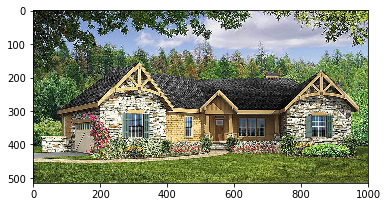

In [7]:
idx = random.randint(0,len(eval_result_list)-1)
show_results(idx,eval_result_list)

### Display tp,fp,fn images

In [8]:
class_score_threshold = \
{0: 0.00,
 1: 0.80,
 2: 0.75,
 3: 0.75,
 4: 0.70,
 5: 0.85,
 6: 0.95,}

In [9]:
def plot_images(img_path_list):
    fig = plt.figure(figsize=(14,20))
    for i in range(len(img_path_list)):
        ax = fig.add_subplot(5,2,i+1)
        ax.imshow(Image.open(img_path_list[i]))
    plt.show()

In [10]:
class_key = 1
tp_idx = []
fp_idx = []
fn_idx = []
for idx in range(len(eval_result_list)):
    row = eval_result_list[idx]
    preds_class = list(row[2]['detection_classes'][0])
    preds_score = list(row[2]['detection_scores'][0])
    pred_list = [cl for cl,sc in zip(preds_class,preds_score) if sc>=class_score_threshold[cl]]
    gt_list = row[1]
    if (class_key in pred_list) and (class_key in gt_list):
        tp_idx.append(idx)
    if (class_key in pred_list) and (class_key not in gt_list):
        fp_idx.append(idx)
    if (class_key not in pred_list) and (class_key in gt_list):
        fn_idx.append(idx)

In [11]:
print('class:{}, #tp:{}, #fp:{}, #fn:{}'.format(idx_to_label[class_key], len(tp_idx),len(fp_idx),len(fn_idx)))

class:country, #tp:17, #fp:2, #fn:2


2


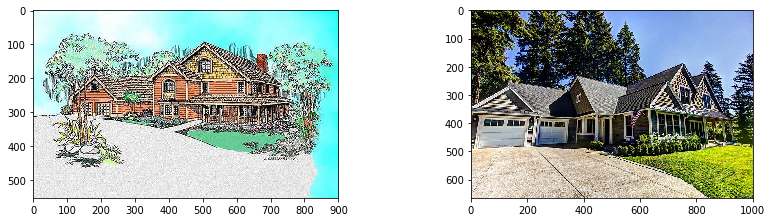

In [19]:
sample_idx = fn_idx#random.sample(fp_idx, k=10)
img_path_list = [os.path.join(images_dir,eval_result_list[i][0]+'.jpg') for i in sample_idx]
print(len(img_path_list))

plot_images(img_path_list)

In [20]:
sample_res = [eval_result_list[i] for i in sample_idx]
sample_res

[('batch1_117753',
  [1],
  {'detection_boxes': array([[[ 0.14733282,  0.10318062,  0.65177369,  0.8489123 ]]], dtype=float32),
   'detection_classes': array([[ 5.]], dtype=float32),
   'detection_scores': array([[ 0.99652499]], dtype=float32),
   'num_detections': array([ 1.], dtype=float32)}),
 ('batch1_116528',
  [1],
  {'detection_boxes': array([[[ 0.26182759,  0.02661952,  0.80314571,  0.92938012]]], dtype=float32),
   'detection_classes': array([[ 6.]], dtype=float32),
   'detection_scores': array([[ 0.99893993]], dtype=float32),
   'num_detections': array([ 1.], dtype=float32)})]